#  Grouping

By the end of this lesson students will be able to:

- Understand and apply the Split-Apply-Combine strategy to analyze grouped data.
- Use groupby() to split a pandas.DataFrame by one or more columns.
- Calculate summary statistics for groups in a pandas.DataFrame.
- Use method chaining for efficient data analysis.

In [1]:
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary statistics

- sum(): sum values in each column,
- count(): count non-NA values in each column,
- min() and max(): get the minimum and maximum value in each column,
- mean() and median(): get the mean and median value in each column,
- std() and var(): get the standard deviation and variance in each column.

In [2]:
# Get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [3]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping

**The Split-Apply-Combine method** 

Split: Split the data into logical groups (e.g. species, sex, island, etc.)

Apply: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body mass by sex, etc.)

Combine: Combine the statistic calculated on each group back together.

For a pandas.DataFrame or pandas.Series, we can use the `groupby()` method to split (i.e. group) the data into different categories. Syntax:

In [ ]:
df.groupby(columns_to_group_by).summary_method()

**Example**

If we don’t use `groupby()` and directly apply the `mean()` method to our flipper length column, we obtain the average of all the values in the column:



In [4]:
penguins['flipper_length_mm'].mean()

200.91520467836258

To get the mean flipper length by species we first group our dataset by the species column’s values. However, if we just use the groupby() method without specifying what we wish to calculate on each group, not much happens up front:

In [5]:
penguins.groupby('species')['flipper_length_mm']

In [6]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

- start with the penguins data frame, and then…
- use groupby() to group the data frame by species values, and then…
- select the 'flipper_length_mm' column, and then…
- calculate the mean() of this column with respect to the groups.


In [7]:
# Average flipper length per species w/ METHOD CHAINING 

avg_flipper = (penguins.groupby("species")
                        .flipper_length_mm
                        .mean()
                        .rename('mean_flipper_length')
                        .sort_values(ascending=False)
                        )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

In [8]:
#When we group by island and year we get the count of non-NA values for each column across each combination of island and year:

penguins.groupby(['island','year']).count()


species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

Let’s say we want to plot the surveyed population per year and island. We could then use method chaining to do this:

<Axes: title={'center': 'Penguins surveyed at the Palmer Archipelago'}, xlabel='island,year', ylabel='Island, Year'>

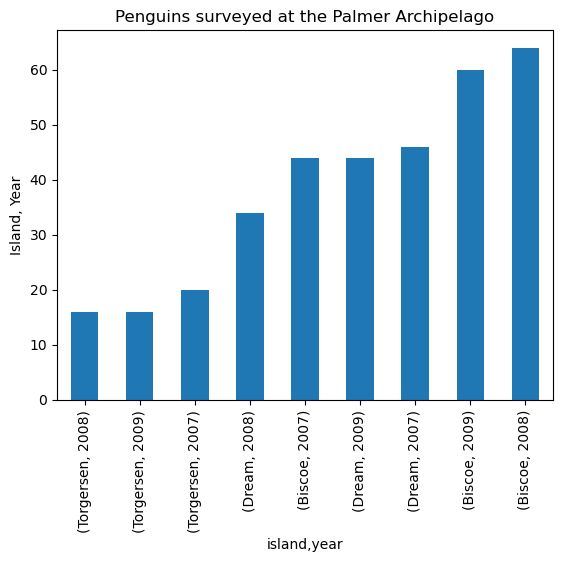

In [9]:
(penguins.groupby(['island','year'])
         .count()
         .species
         .sort_values()
         .plot(kind='bar',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )

# Check-in

1. Use the `max()` method for pandas.DataFrames to calculate the maximum value of a penguin’s body mass by year and species.
2. Use (1) to display the highest body masses per year and species as a bar plot in descending order.

In [10]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [11]:
# by year and species

(penguins.groupby(['species','year'])
         .max()
         .body_mass_g
         .sort_values(ascending = False)
         .plot(kind='bar',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )

TypeError: agg function failed [how->max,dtype->object]